# PCA Beispiel

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline
np.set_printoptions(precision=2,suppress=True)

In [4]:
df = pd.read_csv('../data/unsupervised_1.csv')
df.shape

(10000, 3)

In [5]:
df.head()

,x1,x2,x3
0,9.309193,-5.383622,-3.261579
1,21.764276,-5.148211,5.242210
2,3.864980,-2.043748,3.151791
3,13.109143,11.974642,22.565435
4,4.686292,-12.549872,-7.821465


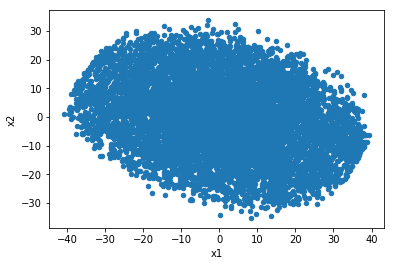

In [6]:
df.plot(kind='scatter',x='x1',y='x2');

In [7]:
pca=PCA()
pca.fit(df.as_matrix())

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
print(pca.explained_variance_)


[ 271.66  268.92   15.73]


In [9]:
cov=np.matrix(pca.get_covariance())
cov

matrix([[ 242.96,  -56.33,   52.37],
        [ -56.33,  147.01,  114.51],
        [  52.37,  114.51,  166.34]])

In [10]:
EW,EV=np.linalg.eig(cov)
EW

array([  15.73,  268.92,  271.66])

In [11]:
#EV hat Eigenvektoren als Spaltenvektoren

EV= np.matrix(EV)
print(EV)
#pca.components hat Eigenvektoren als Zeilenvektoren. Mache daraus Spalten
pca.components_.T

[[-0.32 -0.94  0.15]
 [-0.7   0.34  0.63]
 [ 0.64 -0.1   0.76]]


array([[-0.15, -0.94,  0.32],
       [-0.63,  0.34,  0.7 ],
       [-0.76, -0.1 , -0.64]])

Diese Eigenvektoren sind orthonormal:

In [12]:
EV*EV.T

matrix([[ 1.,  0.,  0.],
        [ 0.,  1., -0.],
        [ 0., -0.,  1.]])

Sie diagonalisieren die Kovarianzmatrix:

In [13]:
EV.T*cov*EV #=EW

matrix([[  15.73,    0.  ,    0.  ],
        [   0.  ,  268.92,   -0.  ],
        [  -0.  ,   -0.  ,  271.66]])

In [14]:
#zwei grösste Eigenvektoren (principal components)
PC = EW.argsort()[-2:][::-1]

In [15]:
S = np.matrix(EV[:,PC])
S

matrix([[ 0.15, -0.94],
        [ 0.63,  0.34],
        [ 0.76, -0.1 ]])

In [16]:
S.T*cov*S

matrix([[ 271.66,   -0.  ],
        [  -0.  ,  268.92]])

In [17]:
print(np.around(EV.T*EV,6))
EV.T*cov*EV

[[ 1.  0.  0.]
 [ 0.  1. -0.]
 [ 0. -0.  1.]]


matrix([[  15.73,    0.  ,    0.  ],
        [   0.  ,  268.92,   -0.  ],
        [  -0.  ,   -0.  ,  271.66]])

In [18]:
dfRotated=pd.DataFrame(pca.fit_transform(df.as_matrix()))
dfRotated.head()

,0,1,2
0,4.288826,-9.898248,1.301026
1,-4.138704,-22.339822,0.003769
2,-1.910162,-4.327688,-2.229828
3,-26.890135,-10.225170,-1.946909
4,12.964244,-7.524113,-2.251372


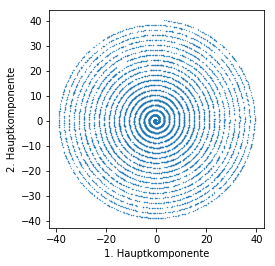

In [19]:
dfRotated.plot(kind='scatter',x=0,y=1,s=0.1).set_aspect('equal')
plt.xlabel('1. Hauptkomponente')
plt.ylabel('2. Hauptkomponente');

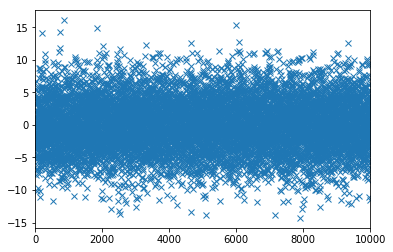

In [20]:
#Die "dünne" Koordinate:
dfRotated[2].plot(linestyle='None',marker='x');

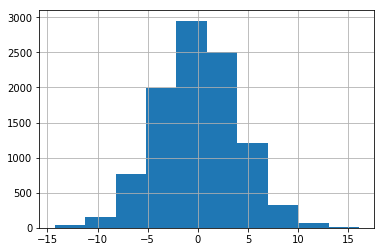

In [21]:
dfRotated[2].hist();

Die Spirale ist also ziemlich dünn! Damit ist die Grösse des Datensatzes um eine Dimension reduziert. 